In [53]:
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt
import re
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append("/home/kyungtak.lim/python_scripts")

import gbspy as g

In [54]:
#os.chdir('/zhisongqu_data/kyungtak/data_GBS/DN_tria/NT_nu1')
os.chdir('/zhisongqu_data/kyungtak/data_GBS/DN_tria/PT_nu1')
s=g.Sim()


In [55]:
#file_path_PT = "/zhisongqu_data/kyungtak/data_GBS/GBS_DN_tria/Equil_DN_PT_d0p6.h5"
#file_path_NT = "/zhisongqu_data/kyungtak/data_GBS/DN_tria/DN_NT"

In [56]:
s.time

array([0.      , 0.010005, 0.02001 , 0.03    , 0.040005, 0.05001 ,
       0.06    ])

In [57]:

t_final = s.time[-1]
t_init = s.time[0]

tempe_3D = s.get_field('Te', t1=t_init, t2=t_final)
dens_3D = s.get_field('n', t1=t_init, t2=t_final)

tempe = np.mean(tempe_3D, axis=(2,3))
dens = np.mean(dens_3D, axis=(2,3))



In [58]:
# For DN
with open('equilibrium') as f:
    lines = f.readlines()
    xmag_str=lines[-5]
    y0_source_str=lines[-4]
    Yxpt_str=lines[-3]
    Yxpt1_str=lines[-2]

    
xmag_split = xmag_str.split('=')
y0_source_split = y0_source_str.split('=')
Yxpt_split = Yxpt_str.split('=')
Yxpt1_split = Yxpt1_str.split('=')


xmag = float(xmag_split[1].strip())
y0_source = float(y0_source_split[1].strip())
Yxpt = float(Yxpt_split[1].strip())
Yxpt1 = float(Yxpt1_split[1].strip())

print("xmag=", xmag)
print("y0_source=", y0_source)
print("Yxpt=", Yxpt)
print("Yxpt1=", Yxpt1)

x0n = s.attribute['x0_EC_theta']
x0t = s.attribute['x0_EC_tempe']
print("The position of x0n and x0t =", x0n,"/", x0t)

wn = s.attribute['wEC_theta']
wt = s.attribute['wEC_tempe']

print("The width of wn and wt =", wn,"/", wt)

# Amplitude of the source
An = s.attribute['SEC_theta']
At = s.attribute['SEC_tempe']

print(s.attribute['SEC_tempe'])
print("The amplitude of An and At =", An,"/", At)



xmag= 389.75
y0_source= 400.0
Yxpt= 156.25
Yxpt1= 646.25
The position of x0n and x0t = 110.0 / 110.0
The width of wn and wt = 720.0 / 720.0
0.15
The amplitude of An and At = 0.3 / 0.15


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Check magnetic equilibrium </b></span><br>
</div>

In [59]:
# Input Parameter
Lx = 600
Ly = 800
Nx = 244
Ny = 324

dx = Lx / (Nx-4)
dy = Ly / (Ny-4)

#xv = np.linspace(-3/2*dx, )
xv = np.arange(-3/2*dx, (Lx+3*dx/2)+1, dx)
yv = np.arange(-3/2*dy, (Ly+3*dy/2)+1, dy)
yn = np.arange(-1/2*dy, (Ly+5*dy/2)+1, dy)

# 2D meshgrid
Xv, Yv = np.meshgrid(xv,yv)
Xn, Yn = np.meshgrid(xv,yn)

X,Y = np.meshgrid(xv,yv)


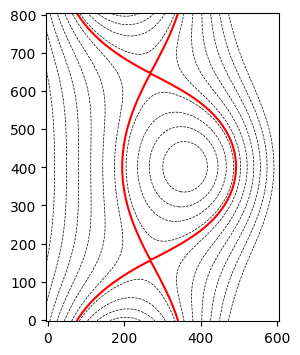

In [60]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height = fig_width / 1.618  # Golden ratio height for a single subplot

fig, axes = plt.subplots(figsize=(3,4), dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

### DNT
levels_NT = np.arange(int(s.Psi[int(len(s.Psi)/2)][int(len(s.Psi[0])/2)]), 
                   int(s.Psi[int(len(s.Psi)/2)][int(len(s.Psi[0]))-1]),
                  int(s.Psi[int(len(s.Psi)/2)][int(len(s.Psi[0])/2)])/200)
axes.contour(X, Y, s.Psi, levels=levels_NT, linestyles='dashed', colors='k', linewidths=0.5)
axes.contour(X, Y, s.Psi, levels=[s.Psi[s.iyxpt, s.ixxpt]], colors='r')


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 40px;"><b> Main 2D plots </b></span><br>
</div>

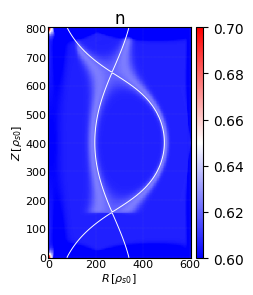

In [61]:
X, Y = np.meshgrid(s.x, s.y)
fig, ax = plt.subplots(figsize=(2, 3),  dpi=100, sharex=True, sharey=True)

cs1 = ax.pcolormesh(X, Y, dens_3D[:,:,-1,-1], cmap='bwr', vmin=0.6, vmax=0.7)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)

ax.contour(X, Y, s.Psi, levels=[s.Psi[s.iyxpt, s.ixxpt]], linewidths=0.7, colors='w')
ax.grid(True, which='major', alpha=1., linestyle=':', linewidth=0.1)
ax.grid(True, which='minor', alpha=0.2, linestyle=':', linewidth=0.1)

ax.tick_params(axis='x', labelsize=8, pad=1)
ax.tick_params(axis='y', labelsize=8, pad=1)
ax.tick_params(which='minor', direction="in", size=0)
ax.tick_params(which='major', direction="in", size=0)

        
ax.set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=8, labelpad=1)
ax.set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=8, rotation=90, labelpad=1)

ax.set_title(r'n', fontsize=12, pad=1.5)

#plt.gca().set_aspect('equal')
plt.show(block=False)

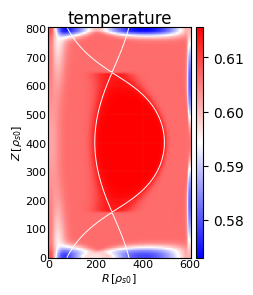

In [62]:
X, Y = np.meshgrid(s.x, s.y)
fig, ax = plt.subplots(figsize=(2, 3),  dpi=100, sharex=True, sharey=True)

cs1 = ax.pcolormesh(X, Y, tempe_3D[:,:,-1,-1], cmap='bwr')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar=fig.colorbar(cs1, cax=cax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)

ax.contour(X, Y, s.Psi, levels=[s.Psi[s.iyxpt, s.ixxpt]], linewidths=0.7, colors='w')
ax.grid(True, which='major', alpha=1., linestyle=':', linewidth=0.1)
ax.grid(True, which='minor', alpha=0.2, linestyle=':', linewidth=0.1)

ax.tick_params(axis='x', labelsize=8, pad=1)
ax.tick_params(axis='y', labelsize=8, pad=1)
ax.tick_params(which='minor', direction="in", size=0)
ax.tick_params(which='major', direction="in", size=0)

        
ax.set_xlabel(r'$R \,[\rho_{s0}]$', fontsize=8, labelpad=1)
ax.set_ylabel(r'$Z\, [\rho_{s0}]$', fontsize=8, rotation=90, labelpad=1)

ax.set_title(r'temperature', fontsize=12, pad=1.5)

#plt.gca().set_aspect('equal')
plt.show(block=False)

# Source profile check

In [40]:
os.chdir('/zhisongqu_data/kyungtak/data_GBS/DN_tria/DN_PT/PT_nu1')
s=g.Sim()

Psi_PT = s.Psi
ixxpt_PT = s.ixxpt
iyxpt_PT = s.iyxpt
x0_PT = s.x0
y0_PT = s.y0

x0n_PT =  80#s.attribute['x0_EC_theta']
x0t_PT = s.attribute['x0_EC_tempe']
print(x0n_PT, x0t_PT)
ix0n_PT = s.find_ind(s.x0 + x0n_PT, s.x)
ix0t_PT = s.find_ind(s.x0 + x0t_PT, s.x)

# Width of the source
wn_PT = s.attribute['wEC_theta']
wt_PT = s.attribute['wEC_tempe']
print(wn_PT, wt_PT)

# Amplitude of the source
An_PT = s.attribute['SEC_theta']
At_PT = s.attribute['SEC_tempe']
print(An_PT, At_PT)

psi0n_PT = Psi_PT[s.iy0, ix0n_PT]
psi0t_PT = Psi_PT[s.iy0, ix0t_PT]

# Density source (Local flux)
Sn_PT = [[0 for x in range(s.nx)] for y in range(s.ny)]
St_PT = [[0 for x in range(s.nx)] for y in range(s.ny)]

for j in range(s.nx):
    for i in range(s.ny):
        if (i < s.iyxpt) and (i > (s.ny-s.iyxpt)):
            Sn_PT[i][j] = An_PT*np.exp(-(Psi_PT[i][j] - psi0n_PT)**2/wn_PT**2) 
            St_PT[i][j] = At_PT/2 * (np.tanh(-(Psi_PT[i][j] - psi0t_PT)/wt_PT) + 1)

# List to array
Sn_PT = np.array(Sn_PT); 
St_PT = np.array(St_PT)

FileNotFoundError: [Errno 2] No such file or directory: '/zhisongqu_data/kyungtak/data_GBS/DN_tria/DN_PT/PT_nu1'

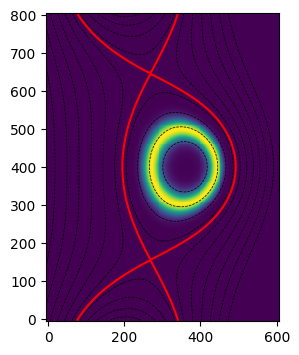

In [104]:
fig, axes = plt.subplots(figsize=(3,4), dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

### DNT
levels_NT = np.arange(int(s.Psi[int(len(s.Psi)/2)][int(len(s.Psi[0])/2)]), 
                   int(s.Psi[int(len(s.Psi)/2)][int(len(s.Psi[0]))-1]),
                  int(s.Psi[int(len(s.Psi)/2)][int(len(s.Psi[0])/2)])/200)
axes.contour(X, Y, s.Psi, levels=levels_NT, linestyles='dashed', colors='k', linewidths=0.5)
axes.contour(X, Y, s.Psi, levels=[s.Psi[s.iyxpt, s.ixxpt]], colors='r')

axes.pcolormesh(X, Y, Sn_PT)
